In [1]:
!pip install keras==2.3.1

In [2]:
!pip install tensorflow==2.0.0-beta1

In [0]:
import keras

In [0]:
import tensorflow as tf

In [0]:
from keras.models import Sequential

In [0]:
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten

In [0]:
from keras.optimizers import Adam

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_path = '/content/drive/My Drive/drawings/training'
test_path = '/content/drive/My Drive/drawings/testing'

In [10]:
train= tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test= tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
training_set = train.flow_from_directory(train_path, target_size=(224,224), class_mode = 'categorical', classes=['healthy', 'parkinson'], batch_size=10)
val_set = train.flow_from_directory(test_path, target_size=(224,224), class_mode = 'categorical', classes=['healthy', 'parkinson'], batch_size=10)

Found 144 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [11]:
print(training_set.image_shape)

(224, 224, 3)


In [0]:
vgg16_model = keras.applications.vgg16.VGG16()

In [0]:
model = Sequential()

In [0]:
for layer in vgg16_model.layers[:-1]: # just exclude last layer from copying
  model.add(layer)

In [0]:
for layer in model.layers:
  layer.trainable = False

In [0]:
model.add(Dense(2, activation='softmax'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [0]:
model.compile(Adam(lr=.00002122), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
History = model.fit_generator(training_set, steps_per_epoch=2, validation_data=val_set, validation_steps=2, epochs=10, verbose=2)

Epoch 1/10
 - 28s - loss: 0.7046 - accuracy: 0.5000 - val_loss: 0.6394 - val_accuracy: 0.6500
Epoch 2/10
 - 22s - loss: 0.6633 - accuracy: 0.4500 - val_loss: 0.6680 - val_accuracy: 0.6500
Epoch 3/10
 - 20s - loss: 0.6663 - accuracy: 0.5000 - val_loss: 0.6140 - val_accuracy: 0.6000
Epoch 4/10
 - 22s - loss: 0.6456 - accuracy: 0.5000 - val_loss: 0.6972 - val_accuracy: 0.6000
Epoch 5/10
 - 21s - loss: 0.6995 - accuracy: 0.5500 - val_loss: 0.6284 - val_accuracy: 0.7000
Epoch 6/10
 - 22s - loss: 0.6846 - accuracy: 0.5500 - val_loss: 0.6295 - val_accuracy: 0.7000
Epoch 7/10
 - 21s - loss: 0.6587 - accuracy: 0.6500 - val_loss: 0.7065 - val_accuracy: 0.5500
Epoch 8/10
 - 23s - loss: 0.6885 - accuracy: 0.5000 - val_loss: 0.6632 - val_accuracy: 0.6000
Epoch 9/10
 - 23s - loss: 0.6437 - accuracy: 0.7000 - val_loss: 0.6640 - val_accuracy: 0.8500
Epoch 10/10
 - 18s - loss: 0.6972 - accuracy: 0.6429 - val_loss: 0.6552 - val_accuracy: 0.7500


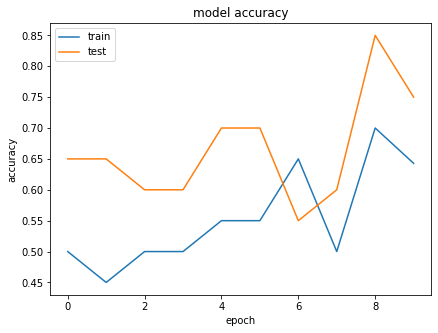

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

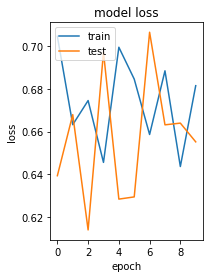

In [22]:
plt.subplot(1,2,2)
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.show()

In [23]:
scores = model.evaluate(val_set)
scores[1]

6/6 [==============================] - 34s 6s/step


0.7166666388511658